In [1]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


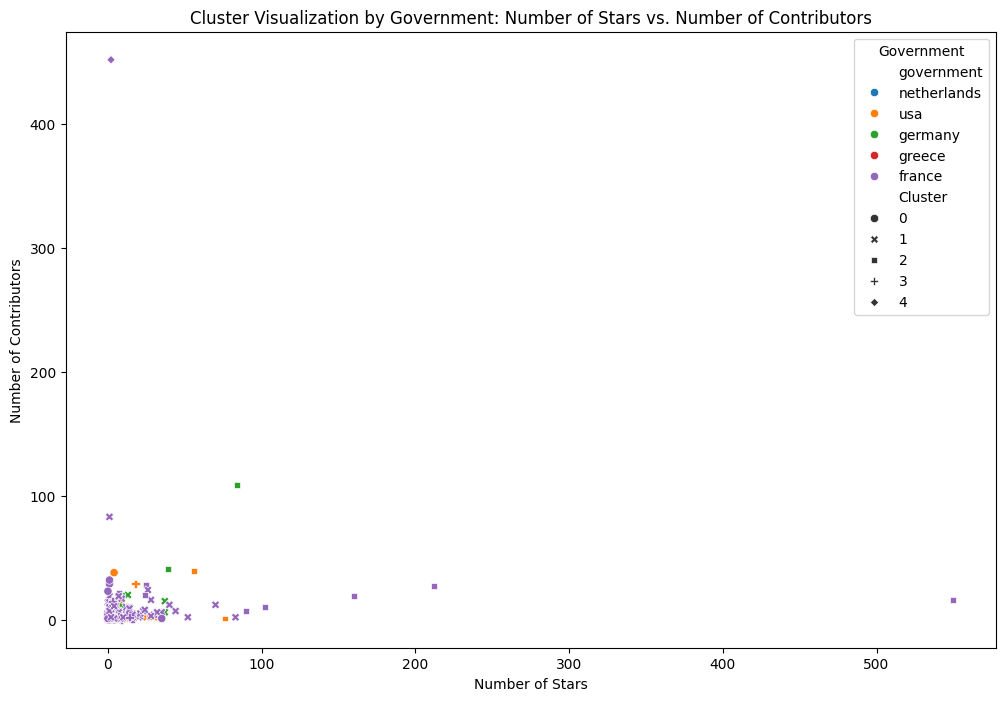

Clustering completed! Results saved to government_repos_with_clusters.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/government_repos_sustainability_metrics.csv'
data = pd.read_csv(file_path)

# Select relevant features for clustering
features = [
    'repo_age_days', 'commit_frequency_per_month', 'avg_issue_resolution_time_hours',
    'open_issues_percentage', 'num_contributors', 'num_forks',
    'num_stars', 'merged_pr_percentage', 'external_pr_percentage'
]

# Fill missing values with 0 for simplicity (this can be refined later)
data.fillna(0, inplace=True)

# Extract relevant data
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='num_stars', y='num_contributors',
    hue='government', style='Cluster', data=data,
    palette='tab10'
)
plt.title('Cluster Visualization by Government: Number of Stars vs. Number of Contributors')
plt.xlabel('Number of Stars')
plt.ylabel('Number of Contributors')
plt.legend(title='Government')
plt.show()

output_file = 'government_repos_with_clusters.csv'
data.to_csv(output_file, index=False)

print(f'Clustering completed! Results saved to {output_file}')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

file_path = 'data/government_repos_sustainability_metrics.csv'
data = pd.read_csv(file_path)

text_data = data['repo_name'] + ' ' + data['repo_full_name']

vectorizer = TfidfVectorizer(stop_words='english')

text_vectors = vectorizer.fit_transform(text_data)

similarity_matrix = cosine_similarity(text_vectors)

similarity_df = pd.DataFrame(similarity_matrix, index=data['repo_full_name'], columns=data['repo_full_name'])

similarity_output_file = 'repo_similarity_matrix.csv'
similarity_df.to_csv(similarity_output_file)

print(f'Similarity detection completed! Results saved to {similarity_output_file}')


Similarity detection completed! Results saved to repo_similarity_matrix.csv


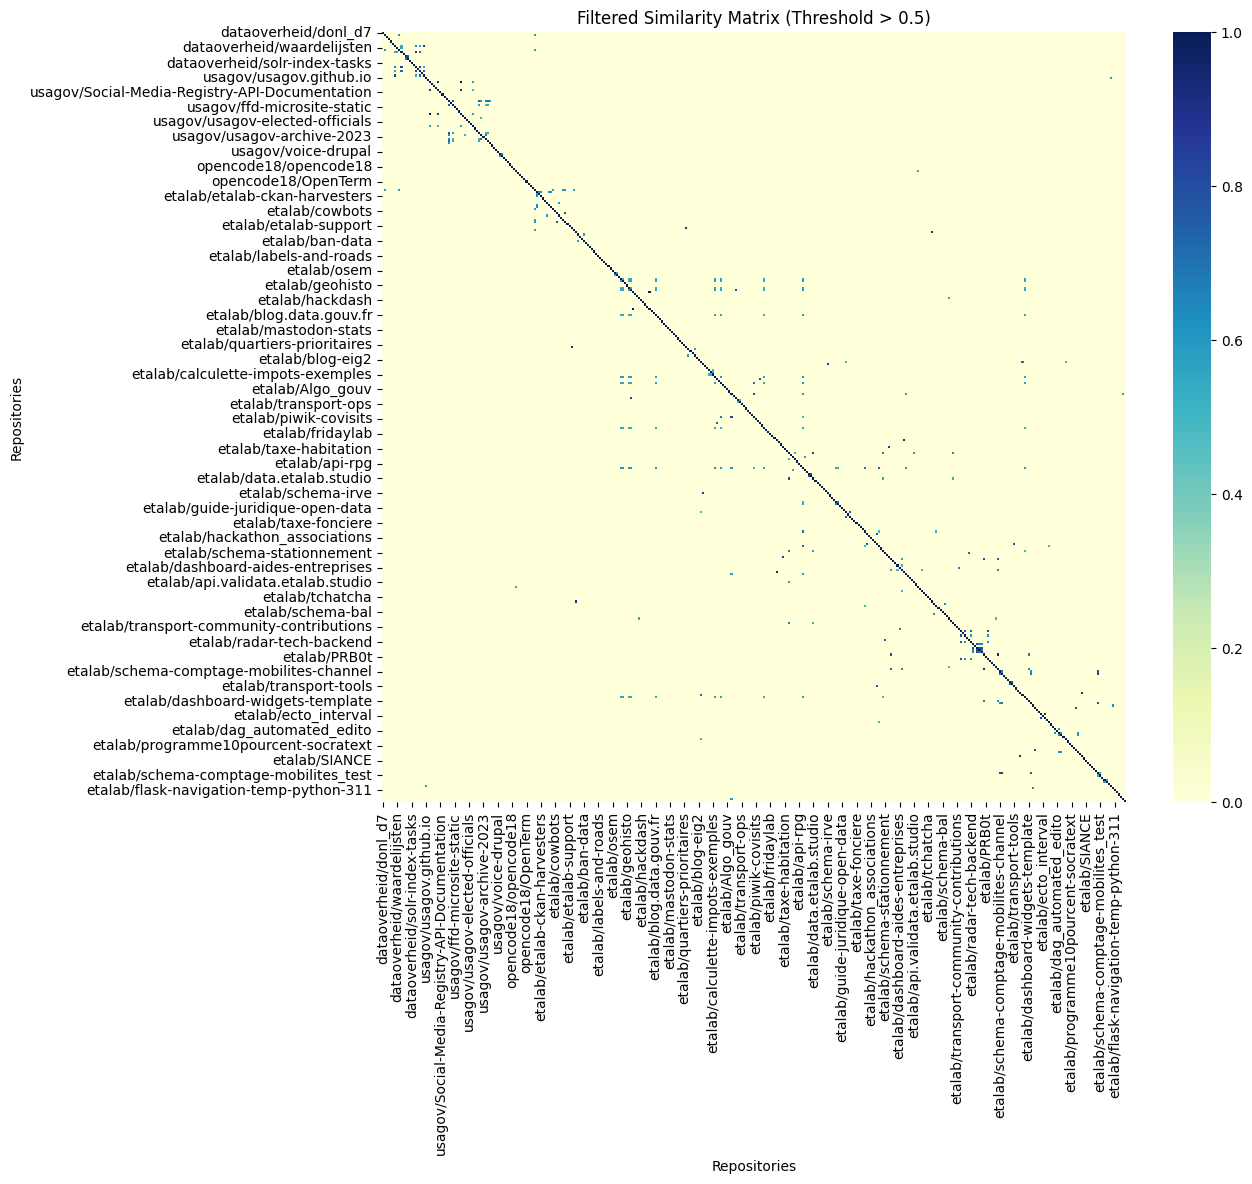

Similarity visualization and filtering completed! Results saved to highly_similar_projects.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

similarity_file = 'repo_similarity_matrix.csv'
similarity_df = pd.read_csv(similarity_file, index_col=0)

similarity_threshold = 0.5  # Adjust this threshold as needed
filtered_similarity = similarity_df.copy()
filtered_similarity[filtered_similarity < similarity_threshold] = 0

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_similarity, cmap='YlGnBu')
plt.title('Filtered Similarity Matrix (Threshold > 0.5)')
plt.xlabel('Repositories')
plt.ylabel('Repositories')
plt.show()

similar_pairs = []
for i in range(len(similarity_df)):
    for j in range(i + 1, len(similarity_df)):
        similarity_score = similarity_df.iloc[i, j]
        if similarity_score > similarity_threshold:
            repo1 = similarity_df.index[i]
            repo2 = similarity_df.columns[j]
            similar_pairs.append((repo1, repo2, similarity_score))

similar_pairs_df = pd.DataFrame(similar_pairs, columns=['Repository 1', 'Repository 2', 'Similarity Score'])

similar_pairs_df.to_csv('highly_similar_projects.csv', index=False)

print('Similarity visualization and filtering completed! Results saved to highly_similar_projects.csv')

In [ ]:
similarity_file = 'highly_similar_projects.csv'
similar_pairs_df = pd.read_csv(similarity_file)

# Remove exact duplicates (where Repository 1 == Repository 2)
filtered_df = similar_pairs_df[similar_pairs_df['Repository 1'] != similar_pairs_df['Repository 2']]

filtered_df['Sorted Pair'] = filtered_df.apply(lambda row: tuple(sorted([row['Repository 1'], row['Repository 2']])), axis=1)
filtered_df = filtered_df.drop_duplicates(subset=['Sorted Pair']).drop(columns=['Sorted Pair'])

output_file = 'cleaned_similar_projects.csv'
filtered_df.to_csv(output_file, index=False)

print(f'Duplicate removal completed! Results saved to {output_file}')

Duplicate removal completed! Results saved to cleaned_similar_projects.csv
